<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,28.421235,30.339931,76.869541,100.943278,246.573985,141.344439,105.229546
1,0.0,1.0,73.106901,92.836634,24.910389,228.343777,429.197701,227.520606,201.677094
2,0.0,2.0,59.131845,46.884073,95.799568,1.371031,213.186517,212.322114,0.864403
3,0.0,3.0,79.733237,45.043266,96.314913,219.197519,450.288936,220.495321,229.793614
4,0.0,4.0,58.314355,53.207929,82.639557,-7.165339,196.996502,208.976928,-11.980426
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.541276,64.154404,38.123946,-342.490434,-198.670808,130.373667,-329.044475
119996,999.0,116.0,76.971619,35.855042,62.583113,55.763729,241.173502,187.967147,53.206356
119997,999.0,117.0,72.242771,75.855468,69.144730,-158.812055,68.430914,242.491585,-174.060671
119998,999.0,118.0,70.933358,39.839333,70.291130,204.131379,395.195200,196.269120,198.926080


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    28.421235  30.339931  76.869541  100.943278  246.573985   
      1.0    73.106901  92.836634  24.910389  228.343777  429.197701   
      2.0    59.131845  46.884073  95.799568    1.371031  213.186517   
      3.0    79.733237  45.043266  96.314913  219.197519  450.288936   
      4.0    58.314355  53.207929  82.639557   -7.165339  196.996502   
...                ...        ...        ...         ...         ...   
999.0 115.0  31.541276  64.154404  38.123946 -342.490434 -198.670808   
      116.0  76.971619  35.855042  62.583113   55.763729  241.173502   
      117.0  72.242771  75.855468  69.144730 -158.812055   68.430914   
      118.0  70.933358  39.839333  70.291130  204.131379  395.195200   
      119.0  51.278169  75.537990  29.475799  -61.664326  104.627631   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    141.344439  105.229546  
      1.0    227.520606  201.677094  
      2.0    212.322114    0.864403  
      3.0    220.495321  229.793614  
      4.0    208.976928  -11.980426  
...                 ...         ...  
999.0 115.0  130.373667 -329.044475  
      116.0  187.967147   53.206356  
      117.0  242.491585 -174.060671  
      118.0  196.269120  198.926080  
      119.0  158.182733  -53.555101  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    28.421235  30.339931  76.869541  100.943278  246.573985   
      1.0    73.106901  92.836634  24.910389  228.343777  429.197701   
      2.0    59.131845  46.884073  95.799568    1.371031  213.186517   
      3.0    79.733237  45.043266  96.314913  219.197519  450.288936   
      4.0    58.314355  53.207929  82.639557   -7.165339  196.996502   
...                ...        ...        ...         ...         ...   
999.0 115.0  31.541276  64.154404  38.123946 -342.490434 -198.670808   
      116.0  76.971619  35.855042  62.583113   55.763729  241.173502   
      117.0  72.242771  75.855468  69.144730 -158.812055   68.430914   
      118.0  70.933358  39.839333  70.291130  204.131379  395.195200   
      119.0  51.278169  75.537990  29.475799  -61.664326  104.627631   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    141.344439  105.229546  
      1.0    227.520606  201.677094  
      2.0    212.322114    0.864403  
      3.0    220.495321  229.793614  
      4.0    208.976928  -11.980426  
...                 ...         ...  
999.0 115.0  130.373667 -329.044475  
      116.0  187.967147   53.206356  
      117.0  242.491585 -174.060671  
      118.0  196.269120  198.926080  
      119.0  158.182733  -53.555101  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,28.421235,30.339931,76.869541,100.943278,246.573985,141.344439,105.229546
1,0.0,1.0,73.106901,92.836634,24.910389,228.343777,429.197701,227.520606,201.677094
2,0.0,2.0,59.131845,46.884073,95.799568,1.371031,213.186517,212.322114,0.864403
3,0.0,3.0,79.733237,45.043266,96.314913,219.197519,450.288936,220.495321,229.793614
4,0.0,4.0,58.314355,53.207929,82.639557,-7.165339,196.996502,208.976928,-11.980426
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.541276,64.154404,38.123946,-342.490434,-198.670808,130.373667,-329.044475
119996,999.0,116.0,76.971619,35.855042,62.583113,55.763729,241.173502,187.967147,53.206356
119997,999.0,117.0,72.242771,75.855468,69.144730,-158.812055,68.430914,242.491585,-174.060671
119998,999.0,118.0,70.933358,39.839333,70.291130,204.131379,395.195200,196.269120,198.926080


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    28.421235  30.339931  76.869541  100.943278  246.573985   
      1.0    73.106901  92.836634  24.910389  228.343777  429.197701   
      2.0    59.131845  46.884073  95.799568    1.371031  213.186517   
      3.0    79.733237  45.043266  96.314913  219.197519  450.288936   
      4.0    58.314355  53.207929  82.639557   -7.165339  196.996502   
...                ...        ...        ...         ...         ...   
999.0 115.0  31.541276  64.154404  38.123946 -342.490434 -198.670808   
      116.0  76.971619  35.855042  62.583113   55.763729  241.173502   
      117.0  72.242771  75.855468  69.144730 -158.812055   68.430914   
      118.0  70.933358  39.839333  70.291130  204.131379  395.195200   
      119.0  51.278169  75.537990  29.475799  -61.664326  104.627631   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    141.344439  105.229546  
      1.0    227.520606  201.677094  
      2.0    212.322114    0.864403  
      3.0    220.495321  229.793614  
      4.0    208.976928  -11.980426  
...                 ...         ...  
999.0 115.0  130.373667 -329.044475  
      116.0  187.967147   53.206356  
      117.0  242.491585 -174.060671  
      118.0  196.269120  198.926080  
      119.0  158.182733  -53.555101  

[120000 rows x 7 columns]

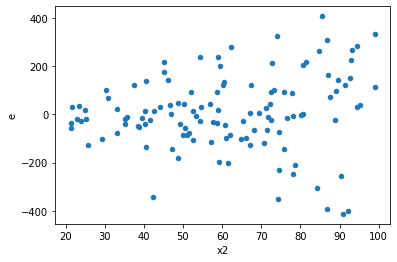

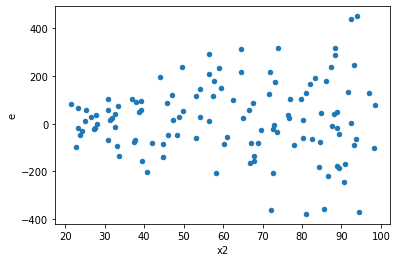

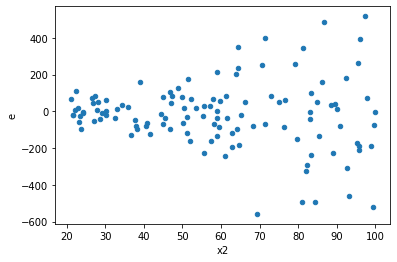

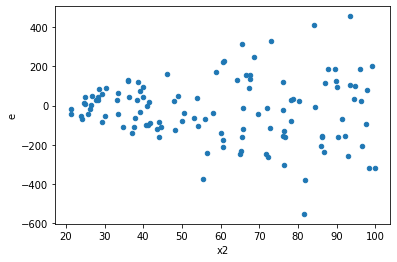

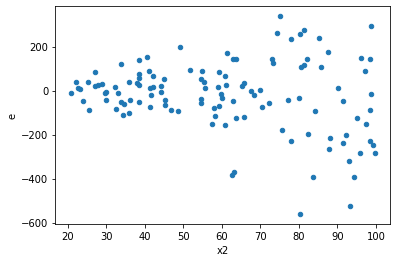

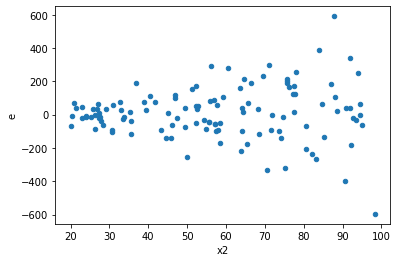

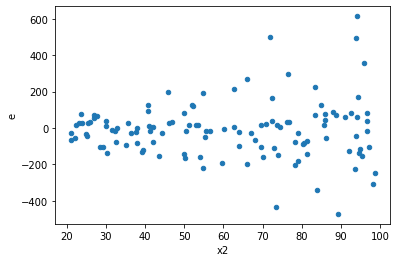

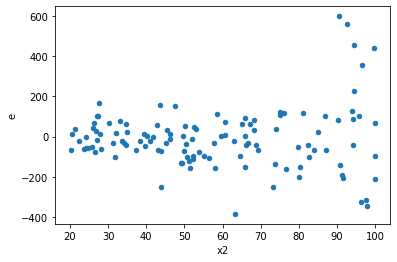

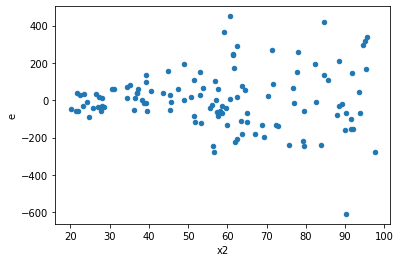

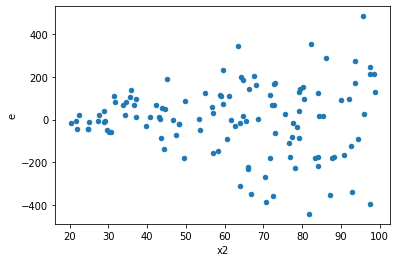

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,58.0,56.0,1349730.8048022443,1338778.1363666225,23271.22077245249,23906.75243511826,1.0273097689579778,0.9205936885249835,0.5397031557375083,0.46029684426249173,Reject001=1 : Homoscedasticity
2.0,55.0,59.0,1502756.4052297529,2170074.7331183525,27322.84373145005,36780.927679972076,1.3461603060605023,0.2629189066160025,0.8685405466919988,0.13145945330800124,Reject001=1 : Homoscedasticity
4.0,65.0,49.0,1578559.177078295,1230433.1974612651,24285.525801204538,25110.881580842146,1.0339855017508688,0.9110527263810551,0.5444736368094725,0.45552636319052753,Reject001=1 : Homoscedasticity
6.0,52.0,62.0,1097833.9960108378,1753489.4781632798,21112.19223097765,28282.088357472254,1.339609266913282,0.2690907817266137,0.8654546091366931,0.13454539086330686,Reject001=1 : Homoscedasticity
7.0,59.0,55.0,1055318.9965096153,1481193.0664789663,17886.762652705343,26930.783026890294,1.5056264540311914,0.12725555587560744,0.9363722220621963,0.06362777793780372,Reject001=1 : Homoscedasticity
9.0,53.0,61.0,1078846.556964422,1947443.514682868,20355.59541442306,31925.30351939128,1.5683797437224776,0.09002226421343207,0.954988867893284,0.045011132106716034,Reject001=1 : Homoscedasticity
10.0,56.0,58.0,497562.745628743,2046100.1141303645,8885.049029084697,35277.588174661454,3.9704438387658074,5.264367342050491e-07,0.9999997367816329,2.6321836710252455e-07,Reject001=0 : Heteroscedasticity
11.0,62.0,52.0,1056352.6805314377,1547745.150444197,17037.94646018448,29764.329816234556,1.7469434996635316,0.04025135179846573,0.9798743241007671,0.020125675899232864,Reject001=1 : Homoscedasticity
14.0,56.0,58.0,410557.0091953075,1803871.4304771367,7331.37516420192,31101.231559950633,4.242209798758301,1.599342411839899e-07,0.9999999200328794,7.996712059199496e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,59.0,1388752.1563865682,1394085.5007956515,25250.039207028512,23628.56781009579,0.9357834107251058,0.8056297496302366,Reject001=1 : Homoscedasticity
1.0,58.0,56.0,1349730.8048022443,1338778.1363666225,23271.22077245249,23906.75243511826,1.0273097689579778,0.9205936885249835,Reject001=1 : Homoscedasticity
2.0,55.0,59.0,1502756.4052297529,2170074.7331183525,27322.84373145005,36780.927679972076,1.3461603060605023,0.2629189066160025,Reject001=1 : Homoscedasticity
3.0,56.0,58.0,2329377.9154972993,613038.4604122298,41596.03420530892,10569.628627797065,0.2541018351804331,7.52937167627842e-07,Reject001=0 : Heteroscedasticity
4.0,65.0,49.0,1578559.177078295,1230433.1974612651,24285.525801204538,25110.881580842146,1.0339855017508688,0.9110527263810551,Reject001=1 : Homoscedasticity
5.0,66.0,48.0,1736691.410058465,1140811.53590044,26313.506213007047,23766.906997925835,0.9032208328883818,0.6944433176071131,Reject001=1 : Homoscedasticity
6.0,52.0,62.0,1097833.9960108378,1753489.4781632798,21112.19223097765,28282.088357472254,1.339609266913282,0.2690907817266137,Reject001=1 : Homoscedasticity
7.0,59.0,55.0,1055318.9965096153,1481193.0664789663,17886.762652705343,26930.783026890294,1.5056264540311914,0.12725555587560744,Reject001=1 : Homoscedasticity
8.0,64.0,50.0,1763875.5216984032,1066177.6723568523,27560.55502653755,21323.55344713705,0.7736982592188362,0.3312161456606055,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      553
Reject001=0 : Heteroscedasticity    447
Name: Result_test, dtype: int64